In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
from sklearn.datasets import load_digits
from sklearn.manifold import TSNE

# Projects digits to embedded space
digits = load_digits()
digits.data.shape
tsne = TSNE(n_components=2)
xt = tsne.fit_transform(digits.data)

In [5]:
digits.data.shape

(1797, 64)

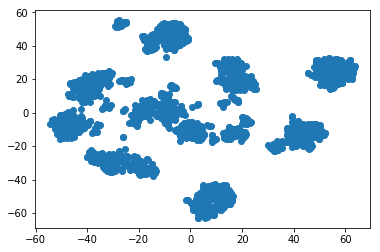

In [6]:
plt.scatter(xt[:,0],xt[:,1])
plt.show()

1165263.690685421


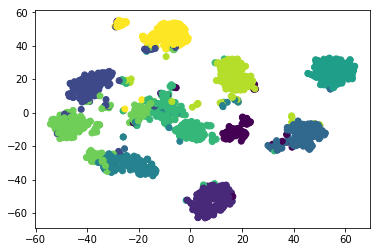

In [8]:
# Apply K-Means clustering with 10 cluster and visualize the clusters
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=10)
kmeans.fit(digits.data)
y_kmeans = kmeans.predict(digits.data)
print(kmeans.inertia_)
plt.scatter(xt[:,0],xt[:,1],c=y_kmeans)
plt.show()

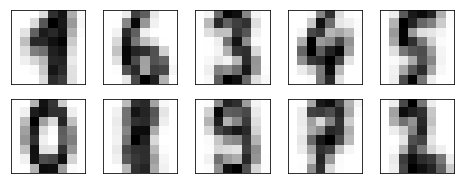

In [9]:
# Visualize cluster centroids
fig, ax = plt.subplots(2, 5, figsize=(8, 3))
centers = kmeans.cluster_centers_.reshape(10, 8, 8)
for axi, center in zip(ax.flat, centers):
    axi.set(xticks=[], yticks=[])
    axi.imshow(center, interpolation='nearest', cmap=plt.cm.binary)

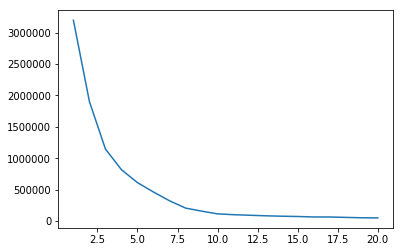

In [10]:
# Calculates SSE (sum square error) for different number of clusters
error = list()
k = list()
for i in range(20):
    kmeans = KMeans(n_clusters=i+1)
    kmeans.fit(xt)
    error.append(kmeans.inertia_)
    k.append(i+1)
# Plots the error rate
plt.plot(k,error)
plt.show()

In [12]:
# Calculates silhouette score for current cluster assignment
from sklearn import metrics
score = metrics.silhouette_score(digits.data, y_kmeans, metric='euclidean')

0.18214307944343733